# Exploratory Data Analysis - Excercise

<hr>

*This notebook contains an excercise on exploratory data analysis (EDA) that aims to assess the assess understanding gained from the EDA tutorial.*

The exercise is organised in 6 parts:
1. Data Loading & Descriptive Statistics
2. Handling Missing Values
3. Categorical Features Encoding
4. Data Scaling (Standardization and Normalization)
5. Feature Engineering
6. Data Analysis

For each part you will have to write **your own code** in the code cells marked with a comment (`# YOUR CODE HERE`). Also, write a short summary explaining what have you done and why, and what can be concluded of it in the markdown cells marked with **"Summary & Key Takeaways:** (Insert here)**"**

***Note**: You can split the code for one part in multiple cells for better organization.*

Example code cell:

In [76]:
# YOUR CODE HERE

Example markdown cell:

**Summary & Key Takeaways:** (Insert here)

## Dataset
<hr>

For the purpose of this tutorial a modified version of the World Energy Consumption dataset will be used.

This dataset  dataset is a collection of key metrics maintained by Our World in Data. It is updated regularly and includes data on energy consumption (primary energy, per capita, and growth rates), energy mix, electricity mix and other relevant metrics. It contains data for multiple countries over the span of multiple years. 

- The dataset is publicly available and can be downloaded from [**Kaggle**](https://www.kaggle.com/datasets/pralabhpoudel/world-energy-consumption/data)
- Refer to [**this codebook**](https://github.com/owid/energy-data/blob/master/owid-energy-codebook.csv) for detailed description of the columns of the dataset

The modified version of the dataset contains **5 countries** from the year of **1990 to 2022.** The included countries are: United States, China, United Kingdom, India and Germany. The data keeps track of 7 different energy sources, specifically, the **consumption** and the **generation** of energy through these sources and also the **share** of each source in **total energy consumption and generation.** 
<br>

The sources include: biofuel, coal, gas, hydro, oil, solar, wind. The fuels are grouped into **fossil fuels** (coal, oil, gas) and **renewable fuels** (biofuel, hydro, solar, wind)<br> 
Additionally, for each country there is information about:
- Population
- GDP
- Electricity Demand
- Electricity Generation
- Carbon Intensity of Electricity Generation 
- Net Electric Imports
- Greenhouse Gas Emissions
- Primary Energy Consumption

<br>

## 1. Data Loading & Descriptive Statistics
<hr>

***Task**: Load the dataset using `pandas` library that you received (placed in the same directory as this notebook). Explore the data by using descriptive statistics.*

In [77]:
import pandas as pd

df = pd.read_csv('./owid-energy-data-modified_v2.csv')
df

,country,year,population,gdp,electricity_demand,electricity_generation,electricity_share_energy,carbon_intensity_elec,greenhouse_gas_emissions,net_elec_imports,...,solar_consumption,solar_electricity,solar_share_elec,solar_share_energy,wind_consumption,wind_electricity,wind_share_elec,wind_share_energy,continent,status
0,China,1991,1.170626e+09,3.508948e+12,NaN,677.55,8.372,NaN,NaN,NaN,...,0.006,0.002,0.000,0.000,0.027,0.009,0.001,0.000,Asia,High-Income
1,China,1992,1.183813e+09,3.755037e+12,NaN,753.94,8.852,NaN,NaN,NaN,...,0.009,0.003,0.000,0.000,0.388,0.131,0.017,0.004,Asia,High-Income
2,China,1993,1.195856e+09,4.126170e+12,NaN,811.59,8.863,NaN,NaN,NaN,...,0.012,0.004,0.000,0.000,0.627,0.212,0.026,0.007,Asia,High-Income
3,China,1994,1.207287e+09,4.438753e+12,NaN,927.80,9.573,NaN,NaN,NaN,...,0.015,0.005,0.001,0.000,1.135,0.384,0.041,0.011,Asia,High-Income
4,China,1995,1.218144e+09,4.810000e+12,NaN,1007.03,10.123,NaN,NaN,NaN,...,0.021,0.007,0.001,0.000,1.822,0.616,0.061,0.018,Asia,High-Income
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,United States,2018,3.321400e+08,1.814065e+13,4246.01,4201.55,17.395,412.062,1731.30,44.46,...,249.513,93.360,2.222,0.932,728.691,272.670,6.490,2.723,North America,High-Income
156,United States,2019,3.343197e+08,NaN,4197.42,4158.38,17.377,392.776,1633.31,39.04,...,284.616,106.890,2.570,1.071,787.816,295.880,7.115,2.965,North America,High-Income
157,United States,2020,3.359420e+08,NaN,4090.49,4043.18,18.456,369.392,1493.52,47.31,...,346.779,130.720,3.233,1.409,896.488,337.940,8.358,3.644,North America,High-Income
158,United States,2021,3.369976e+08,NaN,4192.93,4153.62,17.892,379.260,1575.30,39.31,...,434.585,164.420,3.958,1.675,999.615,378.200,9.105,3.853,North America,High-Income


**Summary & Key Takeaways:** 
This dataset has 22012 instances and 129 features. Using the command `df = pd.read_csv('./World Energy Consumption.csv')` I load the dataset into a data frame and by default an integer ID is given to every instance.

<br>

## 2. Handling Missing Values
<hr>

***Task**: Examine the dataset for any missing values. If any are found, handle them with the method you think is most suitable.*

In [78]:
# code cell 1
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   country                     160 non-null    object 
 1   year                        160 non-null    int64  
 2   population                  160 non-null    float64
 3   gdp                         140 non-null    float64
 4   electricity_demand          133 non-null    float64
 5   electricity_generation      160 non-null    float64
 6   electricity_share_energy    160 non-null    float64
 7   carbon_intensity_elec       115 non-null    float64
 8   greenhouse_gas_emissions    115 non-null    float64
 9   net_elec_imports            133 non-null    float64
 10  primary_energy_consumption  160 non-null    float64
 11  biofuel_consumption         131 non-null    float64
 12  biofuel_electricity         133 non-null    float64
 13  biofuel_share_elec          133 non

country                        0
year                           0
population                     0
gdp                           20
electricity_demand            27
electricity_generation         0
electricity_share_energy       0
carbon_intensity_elec         45
greenhouse_gas_emissions      45
net_elec_imports              27
primary_energy_consumption     0
biofuel_consumption           29
biofuel_electricity           27
biofuel_share_elec            27
biofuel_share_energy          29
coal_consumption               0
coal_electricity               0
coal_share_elec                0
coal_share_energy              0
fossil_electricity             0
fossil_fuel_consumption        0
fossil_share_elec              0
fossil_share_energy            0
gas_consumption                0
gas_electricity                0
gas_share_elec                 0
gas_share_energy               0
hydro_consumption              0
hydro_electricity              0
hydro_share_elec               0
hydro_shar

In [79]:
# code cell 2
df1 = df.copy()
numeric = df1.select_dtypes(include=['float'])
means = numeric.mean()
df1[numeric.columns] = numeric.fillna(means)
df1

,country,year,population,gdp,electricity_demand,electricity_generation,electricity_share_energy,carbon_intensity_elec,greenhouse_gas_emissions,net_elec_imports,...,solar_consumption,solar_electricity,solar_share_elec,solar_share_energy,wind_consumption,wind_electricity,wind_share_elec,wind_share_energy,continent,status
0,China,1991,1.170626e+09,3.508948e+12,1930.461128,677.55,8.372,522.559643,1174.263217,4.218271,...,0.006,0.002,0.000,0.000,0.027,0.009,0.001,0.000,Asia,High-Income
1,China,1992,1.183813e+09,3.755037e+12,1930.461128,753.94,8.852,522.559643,1174.263217,4.218271,...,0.009,0.003,0.000,0.000,0.388,0.131,0.017,0.004,Asia,High-Income
2,China,1993,1.195856e+09,4.126170e+12,1930.461128,811.59,8.863,522.559643,1174.263217,4.218271,...,0.012,0.004,0.000,0.000,0.627,0.212,0.026,0.007,Asia,High-Income
3,China,1994,1.207287e+09,4.438753e+12,1930.461128,927.80,9.573,522.559643,1174.263217,4.218271,...,0.015,0.005,0.001,0.000,1.135,0.384,0.041,0.011,Asia,High-Income
4,China,1995,1.218144e+09,4.810000e+12,1930.461128,1007.03,10.123,522.559643,1174.263217,4.218271,...,0.021,0.007,0.001,0.000,1.822,0.616,0.061,0.018,Asia,High-Income
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,United States,2018,3.321400e+08,1.814065e+13,4246.010000,4201.55,17.395,412.062000,1731.300000,44.460000,...,249.513,93.360,2.222,0.932,728.691,272.670,6.490,2.723,North America,High-Income
156,United States,2019,3.343197e+08,6.548117e+12,4197.420000,4158.38,17.377,392.776000,1633.310000,39.040000,...,284.616,106.890,2.570,1.071,787.816,295.880,7.115,2.965,North America,High-Income
157,United States,2020,3.359420e+08,6.548117e+12,4090.490000,4043.18,18.456,369.392000,1493.520000,47.310000,...,346.779,130.720,3.233,1.409,896.488,337.940,8.358,3.644,North America,High-Income
158,United States,2021,3.369976e+08,6.548117e+12,4192.930000,4153.62,17.892,379.260000,1575.300000,39.310000,...,434.585,164.420,3.958,1.675,999.615,378.200,9.105,3.853,North America,High-Income


In [80]:
# code cell 2
df1.isnull().sum()

country                       0
year                          0
population                    0
gdp                           0
electricity_demand            0
electricity_generation        0
electricity_share_energy      0
carbon_intensity_elec         0
greenhouse_gas_emissions      0
net_elec_imports              0
primary_energy_consumption    0
biofuel_consumption           0
biofuel_electricity           0
biofuel_share_elec            0
biofuel_share_energy          0
coal_consumption              0
coal_electricity              0
coal_share_elec               0
coal_share_energy             0
fossil_electricity            0
fossil_fuel_consumption       0
fossil_share_elec             0
fossil_share_energy           0
gas_consumption               0
gas_electricity               0
gas_share_elec                0
gas_share_energy              0
hydro_consumption             0
hydro_electricity             0
hydro_share_elec              0
hydro_share_energy            0
nuclear_

**Summary & Key Takeaways:**

In `#code cell 1` I analysed the dataset and which fetures contain missing values.

In `#code cell 2` I replaced all of the missing values with the columns mean value.

And finally in `#code cell 3` I checked whether that got rid of all the missing values.

This way I kept all the instances and all the features that the dataset originally had.

<br>

## 3. Categorical Feature Encoding
<hr>

***Task**: Encode the categorical features in your dataset. Ignore the `country` feature.*

In [81]:
from sklearn.preprocessing import LabelEncoder

df2 = df1.copy()
label_encoder = LabelEncoder()
status_label_encoded = label_encoder.fit_transform(df2["status"])

print("Label Encoder Mappings for status:")
for encoded_label, original_label in enumerate(label_encoder.classes_):
    print(f"{encoded_label} -> {original_label}")

print("\nLabel Encoded Data for status:")
print(status_label_encoded)
print("\n")

continent_label_encoded = label_encoder.fit_transform(df2["continent"])

print("Label Encoder Mappings for continent:")
for encoded_label, original_label in enumerate(label_encoder.classes_):
    print(f"{encoded_label} -> {original_label}")

print("\nLabel Encoded Data for continent:")
print(status_label_encoded)

Label Encoder Mappings for status:
0 -> High-Income

Label Encoded Data for status:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


Label Encoder Mappings for continent:
0 -> Asia
1 -> Europe
2 -> North America

Label Encoded Data for continent:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


**Summary & Key Takeaways:** I used Label encoding for the features status and continent. Altthough in this modified version of the dataset there is only one value for the status feature and it was mapped with only one value (0), the countries feature has multiple values and it was mapped to 3 different numerical values (0, 1 and 2).

<br>

## 4. Data Scaling
<hr>

***Task:** Using `StandardScaler()` and `MinMaxScaler()` from `scikit-learn` perform data standardization and normalization. In the summary section explain what are both methods and what is their usage.*

### 4.1 Standardization

In [82]:
from sklearn.preprocessing import StandardScaler

standardized_df = df2.copy()
numerical_columns = standardized_df.select_dtypes(include=["float"]).columns
scaler = StandardScaler()
for country in standardized_df["country"].unique():
    mask = standardized_df["country"] == country
    standardized_df.loc[mask, numerical_columns] = scaler.fit_transform(
        standardized_df.loc[mask, numerical_columns]
    )
standardized_df.describe()

,year,population,gdp,electricity_demand,electricity_generation,electricity_share_energy,carbon_intensity_elec,greenhouse_gas_emissions,net_elec_imports,primary_energy_consumption,...,renewables_share_elec,renewables_share_energy,solar_consumption,solar_electricity,solar_share_elec,solar_share_energy,wind_consumption,wind_electricity,wind_share_elec,wind_share_energy
count,160.000000,160.000000,1.600000e+02,1.600000e+02,1.600000e+02,1.600000e+02,1.600000e+02,1.600000e+02,1.600000e+02,1.600000e+02,...,1.600000e+02,1.600000e+02,1.600000e+02,160.000000,160.000000,1.600000e+02,1.600000e+02,1.600000e+02,1.600000e+02,1.600000e+02
mean,2006.500000,0.000000,5.551115e-17,1.387779e-16,-5.551115e-17,3.663736e-16,-5.551115e-17,-1.526557e-17,3.330669e-17,6.217249e-16,...,-1.942890e-17,-6.661338e-17,-3.885781e-17,0.000000,0.000000,-3.885781e-17,3.330669e-17,-3.330669e-17,-2.220446e-17,-1.110223e-17
std,9.262082,1.003140,1.003140e+00,1.003140e+00,1.003140e+00,1.003140e+00,1.003140e+00,1.003140e+00,1.003140e+00,1.003140e+00,...,1.003140e+00,1.003140e+00,1.003140e+00,1.003140,1.003140,1.003140e+00,1.003140e+00,1.003140e+00,1.003140e+00,1.003140e+00
min,1991.000000,-2.150194,-1.879103e+00,-1.894139e+00,-2.404795e+00,-1.766327e+00,-2.708119e+00,-1.528092e+00,-2.749905e+00,-2.668571e+00,...,-1.963737e+00,-1.718554e+00,-8.131274e-01,-0.804753,-0.790762,-7.979279e-01,-1.064086e+00,-1.031155e+00,-1.113419e+00,-1.088399e+00
25%,1998.750000,-0.774817,-7.052444e-01,-8.601339e-01,-8.786426e-01,-8.900092e-01,-8.103234e-01,-7.678732e-01,-7.549903e-01,-8.624158e-01,...,-7.251162e-01,-7.749066e-01,-5.535532e-01,-0.535300,-0.539094,-5.546000e-01,-7.564841e-01,-7.490510e-01,-7.248811e-01,-7.306537e-01
50%,2006.500000,-0.110849,-2.442910e-01,2.604687e-01,-4.750156e-02,-5.689050e-02,4.058354e-01,-5.258392e-01,2.155628e-02,1.733898e-01,...,-4.008453e-01,-3.718753e-01,-4.805232e-01,-0.479346,-0.507056,-5.001126e-01,-5.150396e-01,-5.203690e-01,-5.154518e-01,-5.115113e-01
75%,2014.250000,0.857299,5.901967e-01,7.694605e-01,8.020433e-01,8.028008e-01,7.930203e-01,9.817192e-01,7.291092e-01,8.234783e-01,...,5.681099e-01,5.780182e-01,1.949248e-01,0.178481,0.194013,2.101078e-01,5.464887e-01,5.248115e-01,6.548303e-01,6.298344e-01
max,2022.000000,2.060780,2.594145e+00,2.132570e+00,2.101633e+00,2.210217e+00,1.333800e+00,1.867524e+00,1.921171e+00,1.890407e+00,...,2.586392e+00,2.534053e+00,3.591316e+00,3.609414,3.303842,3.367832e+00,3.161466e+00,3.187821e+00,2.780708e+00,2.938338e+00


### 4.2 Normalization

In [83]:
from sklearn.preprocessing import MinMaxScaler

normalized_df = df2.copy()
numerical_columns = normalized_df.select_dtypes(include=["float"]).columns
scaler = MinMaxScaler()
for country in normalized_df["country"].unique():
    mask = normalized_df["country"] == country
    normalized_df.loc[mask, numerical_columns] = scaler.fit_transform(
        normalized_df.loc[mask, numerical_columns]
    )
normalized_df.describe()

,year,population,gdp,electricity_demand,electricity_generation,electricity_share_energy,carbon_intensity_elec,greenhouse_gas_emissions,net_elec_imports,primary_energy_consumption,...,renewables_share_elec,renewables_share_energy,solar_consumption,solar_electricity,solar_share_elec,solar_share_energy,wind_consumption,wind_electricity,wind_share_elec,wind_share_energy
count,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,...,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000
mean,2006.500000,0.520117,0.369762,0.530946,0.486766,0.459820,0.650663,0.431595,0.545971,0.569488,...,0.336440,0.332328,0.176964,0.174077,0.177579,0.175508,0.259672,0.253114,0.278894,0.272883
std,9.262082,0.304736,0.320037,0.357377,0.318846,0.295725,0.361465,0.396710,0.314393,0.316672,...,0.293379,0.297566,0.302405,0.300610,0.302057,0.297452,0.314367,0.312221,0.323406,0.319119
min,1991.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1998.750000,0.285160,0.118767,0.165919,0.186246,0.199386,0.357000,0.083931,0.293477,0.311474,...,0.083300,0.083108,0.000119,0.000105,0.000207,0.000352,0.007058,0.006929,0.009681,0.008653
50%,2006.500000,0.485874,0.247288,0.594018,0.497785,0.446240,0.809343,0.256686,0.563334,0.655068,...,0.261404,0.234022,0.001410,0.000911,0.001269,0.001224,0.093975,0.086541,0.112065,0.108408
75%,2014.250000,0.784899,0.648902,0.888661,0.786220,0.675873,0.927328,0.853865,0.831607,0.839620,...,0.538181,0.528041,0.214914,0.203189,0.238016,0.219673,0.434129,0.417666,0.491990,0.463587
max,2022.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Summary & Key Takeaways:**

With the standardisation function code snippet, in the variable standardized_df I save a standardised version of the dataset. It is implemented in such a way that standardisation is performed based on each individual country. Data from other countries doesn't affect the results of standardisation on the data of a particular country.

Standardization is a scaling technique where the values are centered around the mean and have a value of 0 and the standard deviation has a value of 1.

With the normalisation function code snippet, in the variable normalized_df I save a normalized version of the dataset. It is implemented in such a way that normalisation is performed based on each individual country. Data from other countries doesn't affect the results of normalisation on the data of a particular country.

Normalization is a scaling technique in which values are rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.

<br>

## 5. Feature Engineering
<hr>

***Task:** Create a new feature from the existing features in the dataset. The minimum number of new features is 1. Examine how your new features are correlated to the others. Write a summary about your new features.*

In [84]:
df_features = df2.copy()

df_features["electricity_demand_per_capita"] = (
    df_features["electricity_demand"]
    / df_features["population"]
)

df_features["total_renewable_energy"] = (
    df_features["solar_electricity"]
    + df_features["wind_electricity"]
    + df_features["hydro_electricity"]
)

df_features

,country,year,population,gdp,electricity_demand,electricity_generation,electricity_share_energy,carbon_intensity_elec,greenhouse_gas_emissions,net_elec_imports,...,solar_share_elec,solar_share_energy,wind_consumption,wind_electricity,wind_share_elec,wind_share_energy,continent,status,electricity_demand_per_capita,total_renewable_energy
0,China,1991,1.170626e+09,3.508948e+12,1930.461128,677.55,8.372,522.559643,1174.263217,4.218271,...,0.000,0.000,0.027,0.009,0.001,0.000,Asia,High-Income,0.000002,124.700
1,China,1992,1.183813e+09,3.755037e+12,1930.461128,753.94,8.852,522.559643,1174.263217,4.218271,...,0.000,0.000,0.388,0.131,0.017,0.004,Asia,High-Income,0.000002,130.820
2,China,1993,1.195856e+09,4.126170e+12,1930.461128,811.59,8.863,522.559643,1174.263217,4.218271,...,0.000,0.000,0.627,0.212,0.026,0.007,Asia,High-Income,0.000002,152.062
3,China,1994,1.207287e+09,4.438753e+12,1930.461128,927.80,9.573,522.559643,1174.263217,4.218271,...,0.001,0.000,1.135,0.384,0.041,0.011,Asia,High-Income,0.000002,167.818
4,China,1995,1.218144e+09,4.810000e+12,1930.461128,1007.03,10.123,522.559643,1174.263217,4.218271,...,0.001,0.000,1.822,0.616,0.061,0.018,Asia,High-Income,0.000002,191.203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,United States,2018,3.321400e+08,1.814065e+13,4246.010000,4201.55,17.395,412.062000,1731.300000,44.460000,...,2.222,0.932,728.691,272.670,6.490,2.723,North America,High-Income,0.000013,652.650
156,United States,2019,3.343197e+08,6.548117e+12,4197.420000,4158.38,17.377,392.776000,1633.310000,39.040000,...,2.570,1.071,787.816,295.880,7.115,2.965,North America,High-Income,0.000013,685.380
157,United States,2020,3.359420e+08,6.548117e+12,4090.490000,4043.18,18.456,369.392000,1493.520000,47.310000,...,3.233,1.409,896.488,337.940,8.358,3.644,North America,High-Income,0.000012,748.610
158,United States,2021,3.369976e+08,6.548117e+12,4192.930000,4153.62,17.892,379.260000,1575.300000,39.310000,...,3.958,1.675,999.615,378.200,9.105,3.853,North America,High-Income,0.000012,789.090


**Summary & Key Takeaways:**
I created 2 new features. The first one is the electricity demand per capita for a particular year which represents the average yearly electricity demand for a person. The second one is a simple sum of all the energy generated by renewable sources.

<br>

## 6. Data Analysis
<hr>

This section refers to performing various data analysis tasks, split into multiple subtasks. It involves analyzing trends, correlations, patterns and deriving insights from the data.

You can use the engineered features for the analysis or create new ones if needed. For better understanding of the dataset columns please refer to the [**above-mentioned codebook**](https://github.com/owid/energy-data/blob/master/owid-energy-codebook.csv).

### 6.1 Trend Analysis
<hr>

***Task 1**: Plot the trend of electricity generation over the years for each of the five countries*

['China' 'Germany' 'India' 'United Kingdom' 'United States']


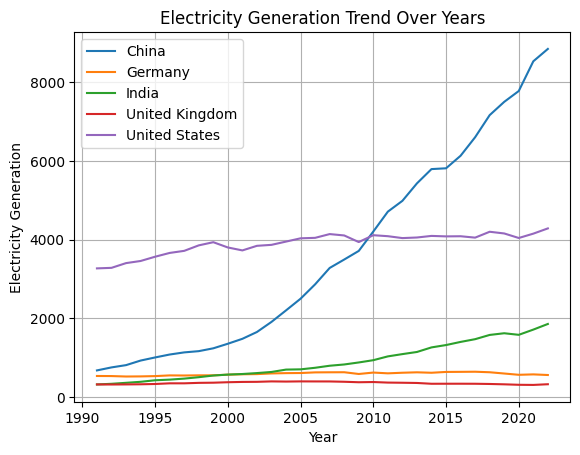

In [85]:
import matplotlib.pyplot as plt

countries_in_df = df2['country'].unique()
print(countries_in_df)

for country in countries_in_df:
    country_data = df2[df2['country'] == country]
    plt.plot(country_data['year'], country_data['electricity_generation'], label=country)

plt.title('Electricity Generation Trend Over Years')
plt.xlabel('Year')
plt.ylabel('Electricity Generation')
plt.legend()
plt.grid(True)
plt.show()

**Summary & Key Takeaways:**
China has had the greatest rise in electricity generation over the years, while the others have mostly remained the same.
Next country with the greatest rise in electricity on the list is India.

<br>

***Task 2:** Explore the trend of renewable energy consumption over time in each country*

['China' 'Germany' 'India' 'United Kingdom' 'United States']


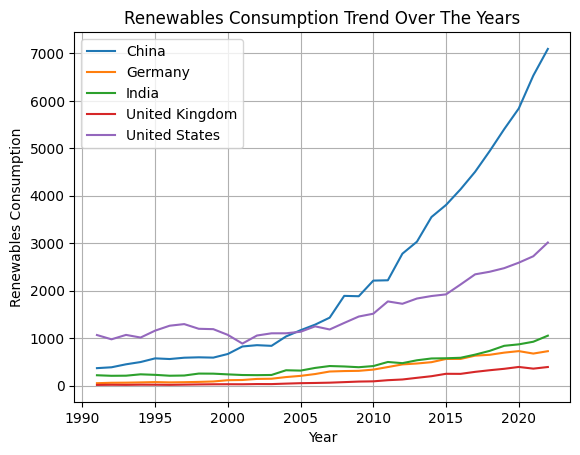

In [86]:
countries_in_df = df2['country'].unique()
print(countries_in_df)

for country in countries_in_df:
    country_data = df2[df2['country'] == country]
    plt.plot(country_data['year'], country_data['renewables_consumption'], label=country)

plt.title('Renewables Consumption Trend Over The Years')
plt.xlabel('Year')
plt.ylabel('Renewables Consumption')
plt.legend()
plt.grid(True)
plt.show()

**Summary & Key Takeaways:**
China has had the greatest rise in renewables consumption. Next country with the greatest rise of renewables consumption is USA. The rest of the countries have a small rise in renewables consumption

<br>

***Task 3:** Explore the trend of an arbitrary column in each country*

['China' 'Germany' 'India' 'United Kingdom' 'United States']


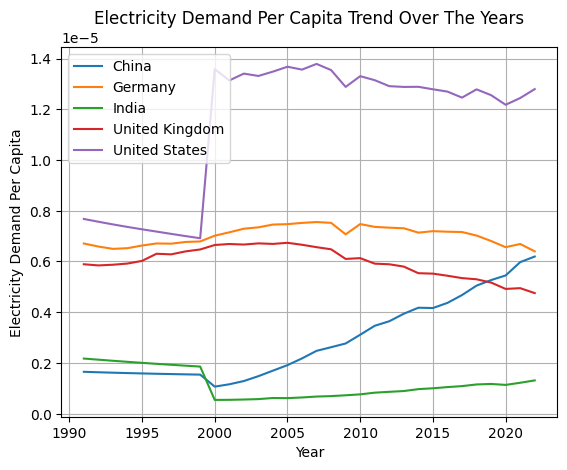

In [87]:
countries_in_df = df_features['country'].unique()
print(countries_in_df)

for country in countries_in_df:
    country_data = df_features[df_features['country'] == country]
    plt.plot(country_data['year'], country_data['electricity_demand_per_capita'], label=country)

plt.title('Electricity Demand Per Capita Trend Over The Years')
plt.xlabel('Year')
plt.ylabel('Electricity Demand Per Capita')
plt.legend()
plt.grid(True)
plt.show()

**Summary & Key Takeaways:**
This is quite a strange feature. It shows that electricity demand for the average chinese person has jumped for almost 50% in less than 2 years. On the other hand it has fallen for the average Indian for more than 50% in the same 2 year period.

<br>

### 6.2 Correlation Analysis
<hr>

***Task 1:** Explore correlation between features. Plot correlation matrix.*

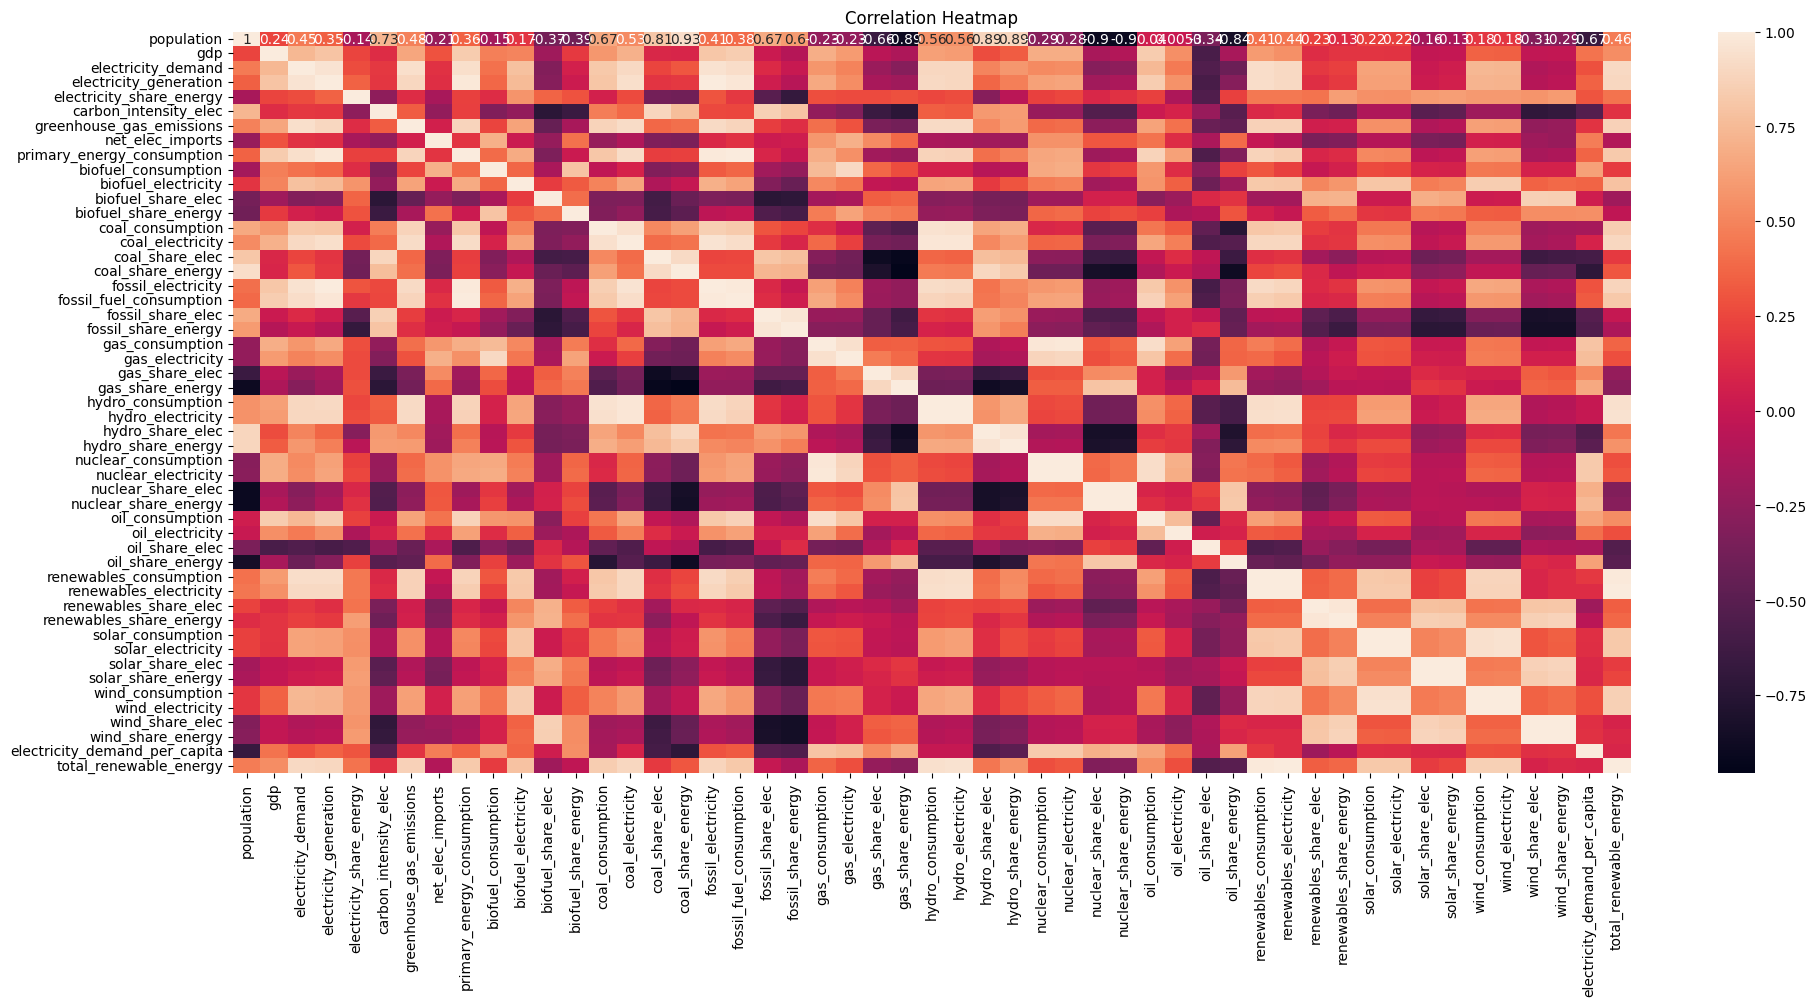

In [88]:
import seaborn as sns

plt.figure(figsize=(20, 10))
correlation_df = df_features.drop(
    ["country", "year", "status", "continent"], axis="columns"
).reset_index(drop=True)
dataplot = sns.heatmap(correlation_df.corr(), annot=True)
plt.tight_layout()
plt.title("Correlation Heatmap")
plt.show()


**Summary & Key Takeaways:**
Corelation is not possible for strings and it makes no sense for years.
This heatmap shows the corelation between different features. This makes sense because we can see that along the main diagonal of the matrix, the corelation factor is the highest because every feature corelates to itself 100% or in our case 1.

<br>

***Task 2:** Investigate the correlation between GDP and energy consumption for each of the five countries.*

In [90]:
countries_in_df = df_features['country'].unique()
print(countries_in_df)

correlations = {}
for country in countries_in_df:
    country_data = df_features[df_features['country'] == country]
    correlation = country_data['gdp'].corr(country_data['electricity_demand'])
    correlations['country'] = correlation
    print(f"Correlation between GDP and energy consumption in {country}: {correlation}")

['China' 'Germany' 'India' 'United Kingdom' 'United States']
Correlation between GDP and energy consumption in China: 0.5225709321072051
Correlation between GDP and energy consumption in Germany: 0.010010084092653963
Correlation between GDP and energy consumption in India: -0.10220332273339566
Correlation between GDP and energy consumption in United Kingdom: -0.47708701283267396
Correlation between GDP and energy consumption in United States: 0.4018893342559805


**Summary & Key Takeaways:**
Correlation between GDP and enrgy consumption is the highest in China which translates to "The rise of GDP affects the rise of energy consumtpion the most, compared to the other 4 countries".

<br>

***Task 3:** Investigate the correlation between two features of your choice.*

In [92]:
countries_in_df = df_features['country'].unique()
print(countries_in_df)

correlations = {}
for country in countries_in_df:
    country_data = df_features[df_features['country'] == country]
    correlation = country_data['electricity_demand_per_capita'].corr(country_data['total_renewable_energy'])
    correlations['country'] = correlation
    print(f"Correlation between electricity demand per capita and total renewable energy generated in {country}: {correlation}")

['China' 'Germany' 'India' 'United Kingdom' 'United States']
Correlation between electricity demand per capita and total renewable energy generated in China: 0.9835086072112986
Correlation between electricity demand per capita and total renewable energy generated in Germany: -0.050031911056532354
Correlation between electricity demand per capita and total renewable energy generated in India: -0.19691447824669756
Correlation between electricity demand per capita and total renewable energy generated in United Kingdom: -0.8901564820984095
Correlation between electricity demand per capita and total renewable energy generated in United States: 0.2514626739554592


**Summary & Key Takeaways:** Correlation between GDP and enrgy consumption is the highest in China which translates to "The rise of electricity demand per capita affects the rise of renewable energy generated the most, compared to the other 4 countries. This doesn't really correlate in the real world but it may be a good statistic regarding how China has taken action to fulfil its population's needs for electricity utilising renewables as a source for generating energy that compensates this need."

<br>

### 6.3 Comparative Analysis
<hr>

***Task 1**: Compare the share of renewable fuels in electricity generation across countries.*

['China' 'Germany' 'India' 'United Kingdom' 'United States']


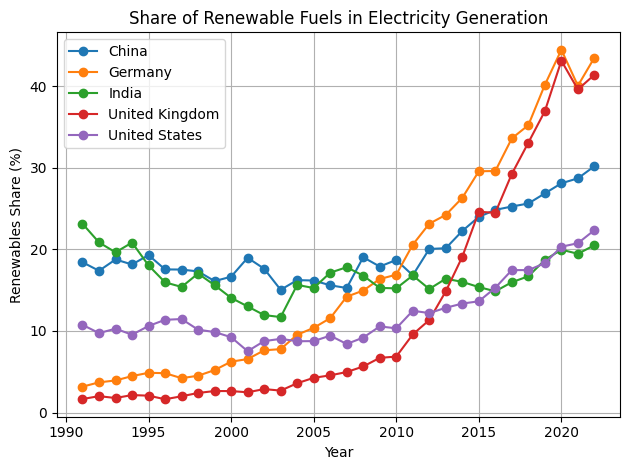

In [93]:
countries_in_df = df_features['country'].unique()
print(countries_in_df)

df_features['Renewables Share'] = df_features['renewables_electricity'] / df_features['electricity_generation'] * 100

for country in countries_in_df:
    country_data = df_features[df_features['country'] == country]
    plt.plot(country_data['year'], country_data['Renewables Share'], marker='o', label=country)

plt.title('Share of Renewable Fuels in Electricity Generation')
plt.xlabel('Year')
plt.ylabel('Renewables Share (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Summary & Key Takeaways:** Germany and UK have the greatest share of renewavles in their energy generation (around 43%)

<br>

***Task 2:** Compare generated energy by source for the countries.*

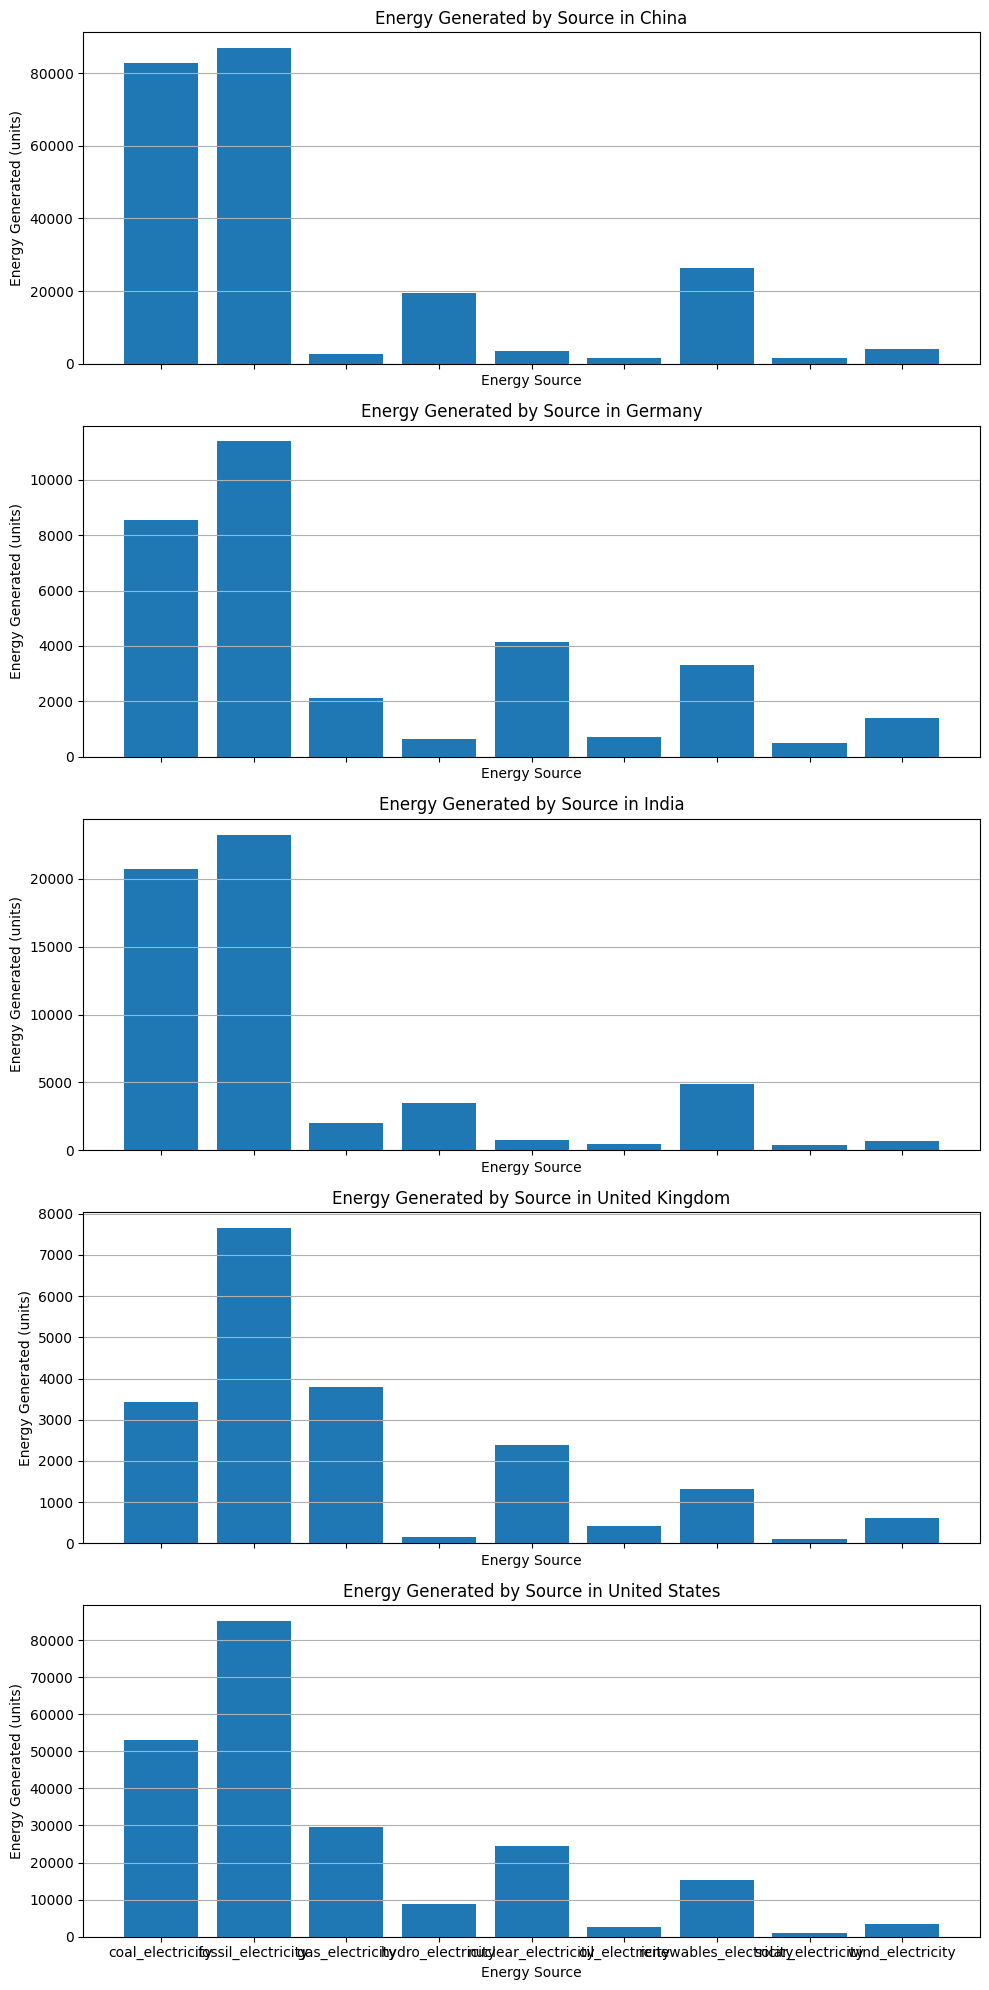

In [94]:
countries_in_df = df_features['country'].unique()
energy_sources_in_df = ['coal_electricity', 'fossil_electricity', 'gas_electricity', 'hydro_electricity', 'nuclear_electricity', 'oil_electricity', 'renewables_electricity', 'solar_electricity', 'wind_electricity'] 

fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(10, 20), sharex=True)

for index, country in enumerate(countries_in_df):
    country_data = df_features[df_features['country'] == country]
    total_energy_by_source = country_data[energy_sources_in_df].sum()
    
    ax = axes[index]
    ax.bar(energy_sources_in_df, total_energy_by_source)
    ax.set_title(f'Energy Generated by Source in {country}')
    ax.set_ylabel('Energy Generated (units)')
    ax.grid(axis='y')
    ax.set_xlabel('Energy Source')

plt.tight_layout()
plt.show()

**Summary & Key Takeaways:** From these bars we get the conclusion that coal and fossil fuels are the ones used the most in electricity generation for these 5 countries.

<br>

***Task 3:** Compare the five countries by a feature of your choice.*

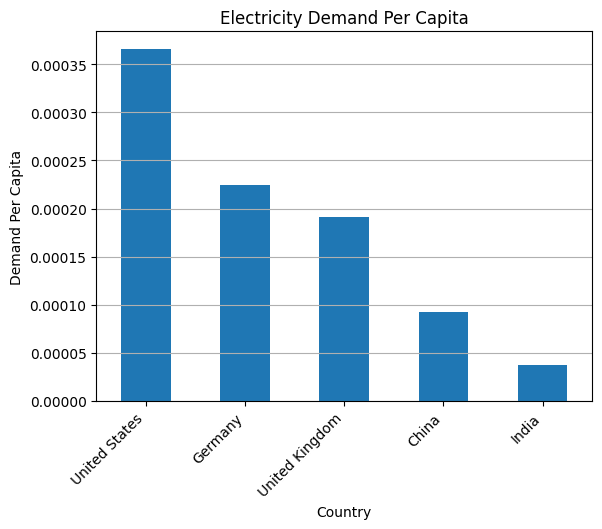

In [95]:
countries_in_df = df_features['country'].unique()
electricity_demand_per_capita = df_features.groupby('country')['electricity_demand_per_capita'].sum()

bar_plot = electricity_demand_per_capita.sort_values(ascending=False).plot(kind="bar")
plt.title("Electricity Demand Per Capita")
plt.xlabel("Country")
plt.ylabel("Demand Per Capita")
plt.xticks(range(len(electricity_demand_per_capita)), electricity_demand_per_capita.sort_values(ascending=False).index, rotation=45, ha="right")
plt.grid(axis="y")
plt.show()

**Summary & Key Takeaways:** This feature proves itself to furthermore not provide any humanly understandable info on which we can draw some conclusions